In [1]:
import pandas as pd
import leveldb
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
db = leveldb.LevelDB('./user_db')
total = 0
for k,v in db.RangeIter():
    total += 1
print total

1857


In [3]:
ur_sts = []
total = 0
for k,v in db.RangeIter():
    u = json.loads(v)
    for s in u['Stats']:
        if s['Season'] == '2017-pre4' and s['Region'] == 'as' and s['Match'] == 'squad':
            ur_st = s['Stats']
            ur_vals = {}
            for v in ur_st:
                ur_vals[v['field']] = float(v['value'])
            ur_sts.append(ur_vals)
user_df = pd.DataFrame(ur_sts)

In [19]:
filter_too_high_kda = []
for u in ur_sts:
    if u['KillDeathRatio'] > 10.0:
        continue
    else:
        filter_too_high_kda.append(u)
filter_df = pd.DataFrame(filter_too_high_kda, columns=['Rating', 'KillDeathRatio', 'DamagePg', 'MoveDistancePg', 'RideDistance' ])
user_df.columns.values

array([u'Assists', u'AvgRideDistance', u'AvgSurvivalTime',
       u'AvgWalkDistance', u'BestRank', u'BestRating', u'Boosts', u'DBNOs',
       u'DailyKills', u'DamageDealt', u'DamagePg', u'Days',
       u'HeadshotKillRatio', u'HeadshotKills', u'HeadshotKillsPg',
       u'Heals', u'HealsPg', u'KillDeathRatio', u'Kills', u'KillsPg',
       u'LongestKill', u'LongestTimeSurvived', u'Losses',
       u'MaxKillStreaks', u'MostSurvivalTime', u'MoveDistance',
       u'MoveDistancePg', u'Rating', u'Revives', u'RevivesPg',
       u'RideDistance', u'RoadKills', u'RoadKillsPg', u'RoundMostKills',
       u'RoundsPlayed', u'Suicides', u'TeamKills', u'TeamKillsPg',
       u'TimeSurvived', u'TimeSurvivedPg', u'Top10Ratio', u'Top10s',
       u'Top10sPg', u'VehicleDestroys', u'WalkDistance', u'WeaponAcquired',
       u'WeeklyKills', u'WinPoints', u'WinRatio', u'WinTop10Ratio', u'Wins'], dtype=object)

In [16]:
filter_df[['Rating','KillDeathRatio','DamagePg', 'MoveDistancePg']]

,Rating,KillDeathRatio,DamagePg,MoveDistancePg
0,2229.0,3.42,391.36,5452.54
1,2674.0,7.71,507.32,6744.13
2,2266.0,3.24,314.96,7199.19
3,2227.0,0.85,118.67,3465.05
4,2354.0,2.50,295.00,4050.49
5,2350.0,2.41,269.50,6423.46
6,2405.0,2.09,210.07,5873.56
7,2272.0,2.22,278.36,5219.52
8,2334.0,1.56,198.17,3187.61
9,2364.0,0.85,130.92,3882.21


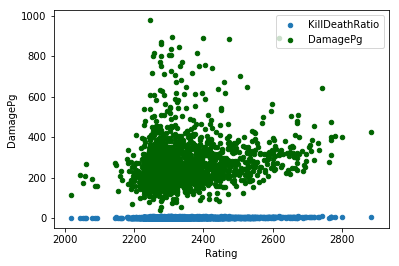

In [8]:
ax = filter_df.plot.scatter(x='Rating', y='KillDeathRatio', label='KillDeathRatio');
filter_df.plot.scatter(x='Rating', y='DamagePg', color='DarkGreen', label='DamagePg', ax=ax);

In [11]:
filter_df['Rating'].corr(filter_df['KillDeathRatio'])

0.25953739121052494

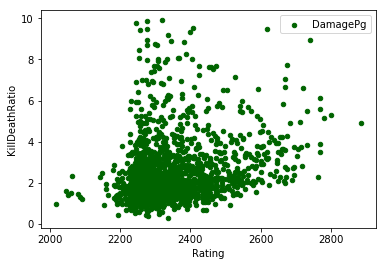

In [13]:
filter_df.plot.scatter(x='Rating', y='KillDeathRatio', color='DarkGreen', label='DamagePg');

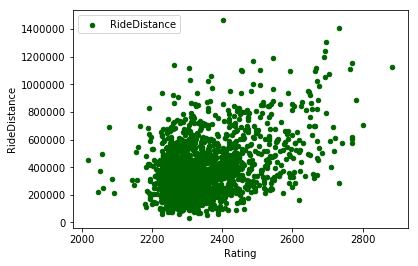

In [21]:
filter_df.plot.scatter(x='Rating', y='RideDistance', color='DarkGreen', label='RideDistance');

In [15]:
filter_df['DamagePg'].corr(filter_df['KillDeathRatio'])

0.91628600954980899